# BASIC SQL PROBLEMS 



**PROBLEM STATEMENT 1** - write a SQL query that will return all the opposites of the values in the Value column. If a number is negative, make it positive and vice versa. For this problem statement, your database table is structured like this:

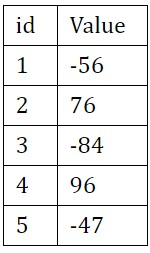

AND Here’s what your query should return: 56, -76, 84, -96, 47


In [1]:
#CREATING DATABASE 

import sqlite3

conn = sqlite3.connect('Test.db')
print("Opened database successfully");

Opened database successfully


In [2]:
#CREATING TABLE 

conn.execute('''CREATE TABLE IF NOT EXISTS Book(id INTEGER, Value INTEGER);''')
conn.commit()
print("Table created successfully");


Table created successfully


In [3]:
# INSERTING VALUES - TABLE SCRIPTS

conn.execute("INSERT OR REPLACE INTO Book (id,Value) VALUES (1,-56);")
conn.execute("INSERT OR REPLACE INTO Book (id,Value) VALUES (2,76);")
conn.execute("INSERT OR REPLACE INTO Book (id,Value) VALUES (3,-84);")
conn.execute("INSERT OR REPLACE INTO Book (id,Value) VALUES (4,96);")
conn.execute("INSERT OR REPLACE INTO Book (id,Value) VALUES (5,-47);")

conn.commit()

In [4]:
# final solution 

conn = sqlite3.connect('Test.db')

cursor = conn.execute(''' 
SELECT id,Value,
CASE WHEN value < 0 THEN ABS(Value) 
     WHEN value > 0 THEN -1*Value 
     ELSE NULL
END as opp_value
from Book ;''')

for row in cursor:
  print(row)
conn.close()

(1, -56, 56)
(2, 76, -76)
(3, -84, 84)
(4, 96, -96)
(5, -47, 47)


**PROBLEM STATEMENT 2**- Write a query for this table that’ll return just the division id's for all the divisions that had positive revenue in 2021.
In this Problem statement, your database table is:

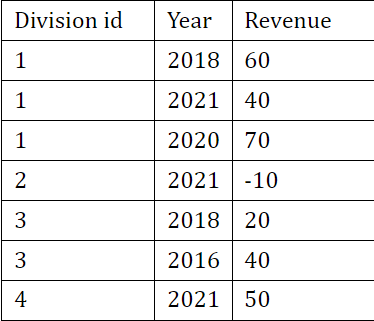

and your query should return the following values: 1,4

In [5]:
# CREATING TABLE 

conn = sqlite3.connect('Test.db')
conn.execute('''CREATE TABLE IF NOT EXISTS Revenue
(Division_id INTEGER, Year INTEGER, Revenue INTEGER);''')
conn.commit()
print("Table created successfully");


Table created successfully


In [6]:
# INSERTING RECORDS - TABLE SCRIPTS 

conn.execute("INSERT OR REPLACE INTO Revenue(division_id,Year,Revenue) VALUES(1,2018,60);")
conn.execute("INSERT OR REPLACE INTO Revenue(division_id,Year,Revenue) VALUES(1,2021,40);")
conn.execute("INSERT OR REPLACE INTO Revenue(division_id,Year,Revenue) VALUES(1,2020,70);")
conn.execute("INSERT OR REPLACE INTO Revenue(division_id,Year,Revenue) VALUES(2,2021,-10);")
conn.execute("INSERT OR REPLACE INTO Revenue(division_id,Year,Revenue) VALUES(3,2018,20);")
conn.execute("INSERT OR REPLACE INTO Revenue(division_id,Year,Revenue) VALUES(3,2016,40);")
conn.execute("INSERT OR REPLACE INTO Revenue(division_id,Year,Revenue) VALUES(4,2021,50);")

conn.commit()

In [7]:
# final solution 

conn = sqlite3.connect('Test.db')

cursor = conn.execute(''' 
SELECT DISTINCT division_id FROM Revenue 
WHERE year = 2021 
AND Revenue > 0 ''')

for row in cursor:
  print(row)


(1,)
(4,)


**PROBLEM STATEMENT 3 - Find the century for the year** : 
Write a query that’ll return the century that the year is in. In this challenge, your database table looks like this:

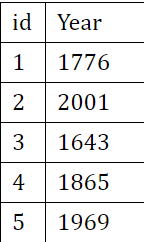

The results of this query should have the following values: 18, 21, 17, 19, 20

In [8]:
# TABLE CREATION 

conn.execute('''CREATE TABLE IF NOT EXISTS Century_Year(id INTEGER, Year INTEGER);''')
conn.commit()
print("Table created successfully");

Table created successfully


In [9]:
# INSERTING RECORDS 

conn.execute("INSERT INTO Century_Year(id,Year) VALUES(1,1776);")
conn.execute("INSERT INTO Century_Year(id,Year) VALUES(2,2001);")
conn.execute("INSERT INTO Century_Year(id,Year) VALUES(3,1643);")
conn.execute("INSERT INTO Century_Year(id,Year) VALUES(4,1865);")
conn.execute("INSERT INTO Century_Year(id,Year) VALUES(5,1969);")

conn.commit()

In [10]:
# Final Solution 

conn = sqlite3.connect('Test.db')

cursor = conn.execute(''' 
SELECT SUBSTR(year,1,2)+1  AS century
FROM century_year ''')

for row in cursor:
  print(row)
conn.close()

(18,)
(21,)
(17,)
(19,)
(20,)


**PROBLEM STATEMENT 4 - Even or odd**
Write a query to return whether or not the number in the Value column is even or odd rather than returning the number itself.Here’s the database table you’ll use in this challenge:


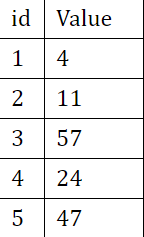

Your query should return the following values: even, odd, odd, even, odd

In [11]:
conn = sqlite3.connect('Test.db')
conn.execute('''CREATE TABLE IF NOT EXISTS Even_Odd(id INTEGER, Value INTEGER);''')
conn.commit()
print("Table created successfully");

Table created successfully


In [12]:
conn.execute("INSERT INTO Even_odd(id,Value) VALUES(1,4);")
conn.execute("INSERT INTO Even_odd(id,Value) VALUES(2,11);")
conn.execute("INSERT INTO Even_odd(id,Value) VALUES(3,57);")
conn.execute("INSERT INTO Even_odd(id,Value) VALUES(4,24);")
conn.execute("INSERT INTO Even_odd(id,Value) VALUES(5,47);")

conn.commit()

In [13]:
#Final solution 
conn = sqlite3.connect('Test.db')

cursor = conn.execute(''' 
SELECT DISTINCT id, Value, 
CASE WHEN Value%2 ==0 THEN 'Even' 
WHEN Value%2!=0 THEN 'Odd' 
END AS category
FROM Even_odd''')

for row in cursor:
  print(row)
conn.close()

(1, 4, 'Even')
(2, 11, 'Odd')
(3, 57, 'Odd')
(4, 24, 'Even')
(5, 47, 'Odd')


**PROBLEM STATEMENT 5 - GROUP BY AGE**
Write a query that’ll group all the people by their age, along with a count of the people that are the same age. 
This is the table structure that you’ll use for this SQL challenge:

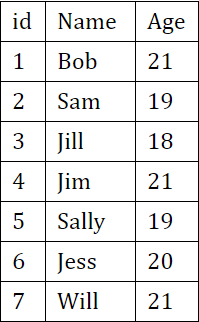

Here’s what the result set should look like:


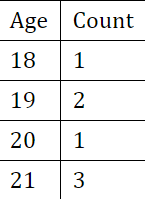

In [14]:
# CREATING TABLE

conn = sqlite3.connect('Test.db')

conn.execute('''CREATE TABLE IF NOT EXISTS age(id INTEGER,Name TEXT,Age INTEGER);''')
conn.commit()
print("Table created successfully");

Table created successfully


In [15]:
#INSERTING RECORDS 

conn.execute("INSERT INTO Age(id,Name,Age) VALUES(1,'Bob',21);")
conn.execute("INSERT INTO Age(id,Name, Age) VALUES(2,'Sam',19);")
conn.execute("INSERT INTO Age(id,Name, Age) VALUES(3,'Jill',18);")
conn.execute("INSERT INTO Age(id,Name, Age) VALUES(4,'Jim',21);")
conn.execute("INSERT INTO Age(id,Name, Age) VALUES(5,'Sally',19);")
conn.execute("INSERT INTO Age(id,Name, Age) VALUES(6,'Jess',20);")
conn.execute("INSERT INTO Age(id,Name, Age) VALUES(7,'Will',21);")

conn.commit()

In [16]:
conn = sqlite3.connect('Test.db')

cursor = conn.execute(''' 
SELECT age, COUNT(1) AS Count
FROM age 
GROUP BY Age ;''')

for row in cursor:
  print(row)
conn.close()

(18, 1)
(19, 2)
(20, 1)
(21, 3)
